## Домашка 1
#### *«Великаны — как луковицы. Лук многослоен! Я тоже! Слой за слоем. Ты усёк? Мы многослойные!» — Шрек*

Эта домашка про декомпозицию и срезы. За неё можно получить максимум 6 баллов. На решение отводится **14 календарных дней** с момента выдачи. Обратите внимание, что **дедлайны на курсе сразу жёсткие**, а значит отправка решений после них запрещена.
Задание выполняется самостоятельно, списывания не допускаются. При обнаружении одинаковых работ балл за задание анулируется у всех студентов, вне зависимости от того, кто у кого списал.

#### **Как сдать домашку?**
1. Скачайте этот ноутбук.
2. Решите задания (локально или в Google Colab). 
3. Опубликуйте решенный ноутбук в свой GitHub репозиторий (проверьте, чтобы он был публичным).
4. Приложите ссылку на решение в Яндекс-Форму для сдачи ДЗ (будет доступна на LMS Karpov Courses и в Телеграм-канале курса).

**Внимание**: Если вы работаете в Google Colab, также скачивайте .ipynb файл и публикуйте его в репозитории. Ссылки на Colab к сдаче не принимаются.


Все датасеты, с которыми предлагается работать в домашних заданиях, взяты из открытых источников или сгенерированы. Любые паттерны, найденные вне заданной канвы решения, являются случайными и не несут в себе смысла или инсайта.

[Данные](https://github.com/brezhnevaan/hse_product_metrics_course/releases/download/datasets_for_hw/hw_1_data.zip)

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### Case Study. Что-то пошло не так в маркетплейсе 🛒

**Легенда**  
Вы работаете продуктовым аналитиком в маркетплейсе. Ваша команда отвечает за функционал корзины — точки входа, дизайн и функционал самой корзины, путь пользователя с момента добавления товара в корзину и до оформления покупки. 

Компания — стартап без системы автоматического мониторинга. Поэтому последние 14 дней, пока вы были в отпуске, никто не следил за метриками корзины. 

Вы отлично отдохнули и в первый же день после каникул рвётесь в бой. Наливаете чашку кофе, открываете ноутбук и проверяете, что творилось в ваше отсутствие.

In [4]:
df = pd.read_parquet("hw_1_marketplace_data.parquet")

In [5]:
df.head()

,user_id,session_id,event_ts,platform,app_version,region,channel,category,event,product_id,price,quantity
0,30,1094418511,2025-04-01 19:49:57,Desktop,web,siberia,ads_search,None,search,NaN,NaN,NaN
1,30,1094418511,2025-04-01 20:02:23,Desktop,web,siberia,ads_search,electronics,view_item,123443.0,NaN,NaN
2,30,1094418511,2025-04-01 20:22:53,Desktop,web,siberia,ads_search,fashion,view_item,162950.0,NaN,NaN
3,30,1094418511,2025-04-01 20:40:57,Desktop,web,siberia,ads_search,home,view_item,199979.0,NaN,NaN
4,30,1094418511,2025-04-01 20:41:07,Desktop,web,siberia,ads_search,home,add_to_cart,199979.0,NaN,NaN


Описание данных

- user_id — уникальный идентификатор пользователя
- session_id — уникальный идентификатор сессии
- event_ts — таймстемп событий
- platform — платформа, с которой пришло событие
- app_version — версия приложения (существует только для iOS и Android, для остальных платформ приходят значения-заглушки)
- region — регион пользователя
- channel — канал, с которого пришел пользователь
- category — категория товаров, которой принадлежит ивент
- event — событие, совершенное пользователем
- product_id — идентификатор товара для событий над товарами
- price — цена товара, ивент приходит только для события покупки
- quantity — количество товаров, ивент приходит только для события покупки

#### **1. Детекция проблемы — 1 балл**

1) Посчитайте подневные конверсии: из просмотра в покупку, из просмотра в добавление в корзину, из добавления в корзину — в покупку.
2) Визуализируйте полученную динамику. 
3) Опишите, что вы видите на графике: когда и в каких метриках началось падение? есть ли устойчивый тренд?

*К подсчёту конверсий можно подойти разными способами — считать их по событиям, сессиям или уникальным юзерам. В нашей задаче будем считать по сессиям.*

Примеры событий: ['search' 'view_item' 'add_to_cart' 'add_to_favorites' 'purchase'
 'remove_from_cart']
   event_date  views  carts  purchases  view_to_purchase  view_to_cart  \
0  2025-04-01   1949    633        209          0.107234      0.324782   
1  2025-04-02   2092    677        208          0.099426      0.323614   
2  2025-04-03   2124    668        201          0.094633      0.314501   
3  2025-04-04   2291    764        215          0.093845      0.333479   
4  2025-04-05   3187   1049        337          0.105742      0.329150   

   cart_to_purchase  
0          0.330174  
1          0.307238  
2          0.300898  
3          0.281414  
4          0.321258  
    event_date  views  carts  purchases  view_to_purchase  view_to_cart  \
25  2025-04-26   3287   1461        341          0.103742      0.444478   
26  2025-04-27   2794   1270        293          0.104868      0.454545   
27  2025-04-28   1859    817        183          0.098440      0.439484   
28  2025-04-29   19

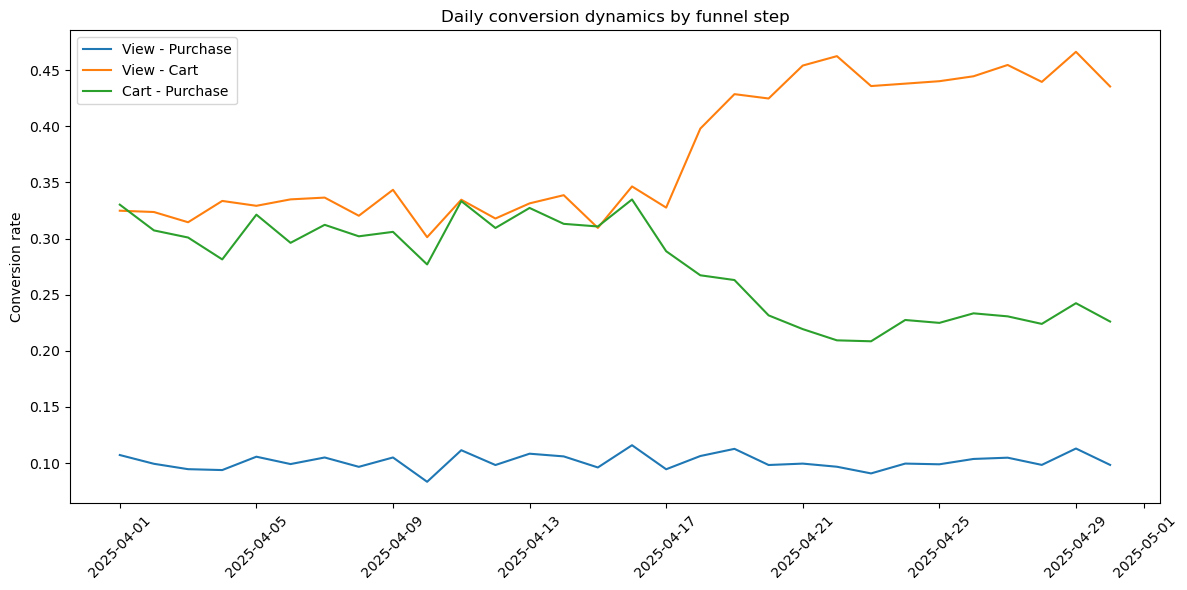

График сохранён как daily_conversions.png


<Figure size 640x480 with 0 Axes>

In [8]:
df['event_date'] = pd.to_datetime(df['event_ts']).dt.date
df['event_norm'] = df['event'].astype(str).str.strip().str.lower()

print("Примеры событий:", df['event_norm'].dropna().unique()[:20])

def is_view(e): 
    return isinstance(e, str) and ('view' in e)

def is_cart(e):
    return isinstance(e, str) and ('cart' in e or 'add_to_cart' in e)

def is_purchase(e):
    return isinstance(e, str) and ('purchase' in e or 'order' in e or 'checkout' in e)

session_events = (
    df.groupby(['event_date', 'session_id'])['event_norm']
      .apply(lambda x: set(x))
      .reset_index(name='events_set')
)

session_events['view'] = session_events['events_set'].apply(lambda s: any(is_view(e) for e in s))
session_events['cart'] = session_events['events_set'].apply(lambda s: any(is_cart(e) for e in s))
session_events['purchase'] = session_events['events_set'].apply(lambda s: any(is_purchase(e) for e in s))

daily_conv = (
    session_events.groupby('event_date')
    .agg(
        views=('view', 'sum'),
        carts=('cart', 'sum'),
        purchases=('purchase', 'sum')
    )
    .reset_index()
    .sort_values('event_date')
)

daily_conv['view_to_purchase'] = np.where(daily_conv['views']>0, daily_conv['purchases']/daily_conv['views'], np.nan)
daily_conv['view_to_cart'] = np.where(daily_conv['views']>0, daily_conv['carts']/daily_conv['views'], np.nan)
daily_conv['cart_to_purchase'] = np.where(daily_conv['carts']>0, daily_conv['purchases']/daily_conv['carts'], np.nan)

print(daily_conv.head())
print(daily_conv.tail())

plt.figure(figsize=(12,6))
plt.plot(daily_conv['event_date'], daily_conv['view_to_purchase'], label='View - Purchase')
plt.plot(daily_conv['event_date'], daily_conv['view_to_cart'], label='View - Cart')
plt.plot(daily_conv['event_date'], daily_conv['cart_to_purchase'], label='Cart - Purchase')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Conversion rate")
plt.title("Daily conversion dynamics by funnel step")
plt.tight_layout()

plt.show()
plt.savefig("daily_conversions.png", dpi=150, bbox_inches='tight')
print("График сохранён как daily_conversions.png")

В начале апреля конверсия из просмотра в корзину была около 0.32-0.33, а из корзины в покупку держалась на уровне 0.28-0.33. К концу апреля доля view - cart выросла до 0.44-0.46, то есть пользователи активнее добавляют товары в корзину. Но при этом cart - purchase упала до 0.22-0.23, это означает, что многие дошли до корзины, но значительно меньше людей завершили покупку. Общая конверсия view - purchase осталась примерно на том же уровне 0.10, но структура воронки изменилась, выросла промежуточная активность (добавления в корзину) и ухудшился финальный шаг (оформление заказа). Главная проблема конца апреля - именно падение в шаге cart - purchase.

#### **2. Проверка абсолютных и средних значений — 1 балл**

1) Постройте графики дневной динамики абсолютных значений, из которых рассчитаны конверсии выше.
2) Рассчитайте и визуализируйте среднее число событий (именно событий, не сессий), из которых рассчитаны конверсии, на пользователя. 
3) На каком этапе воронки появилась проблема?

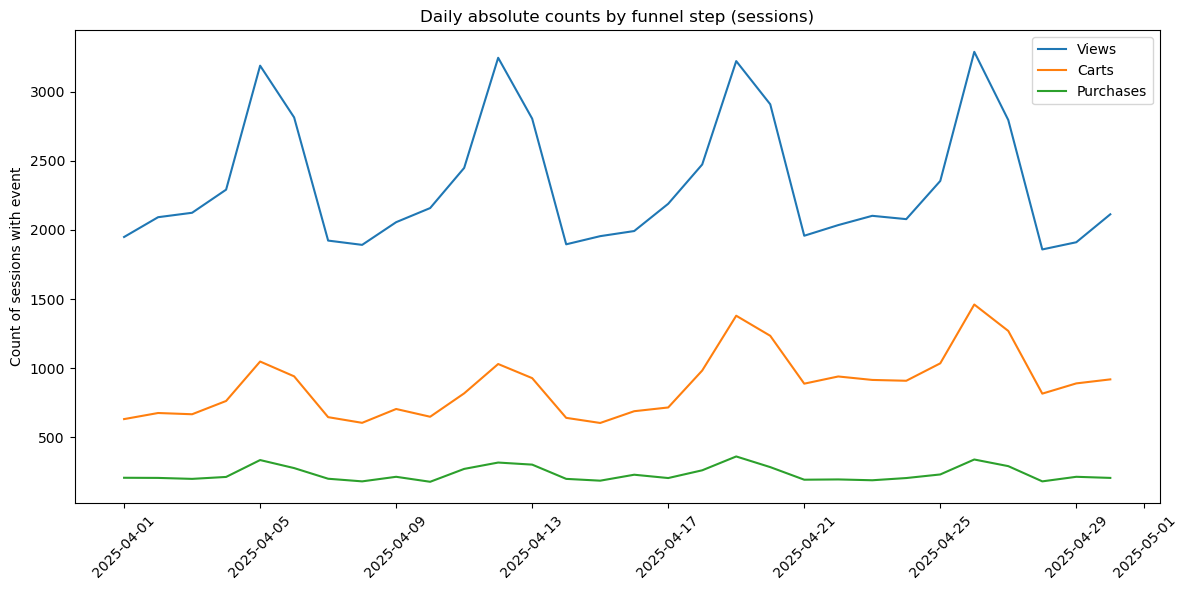

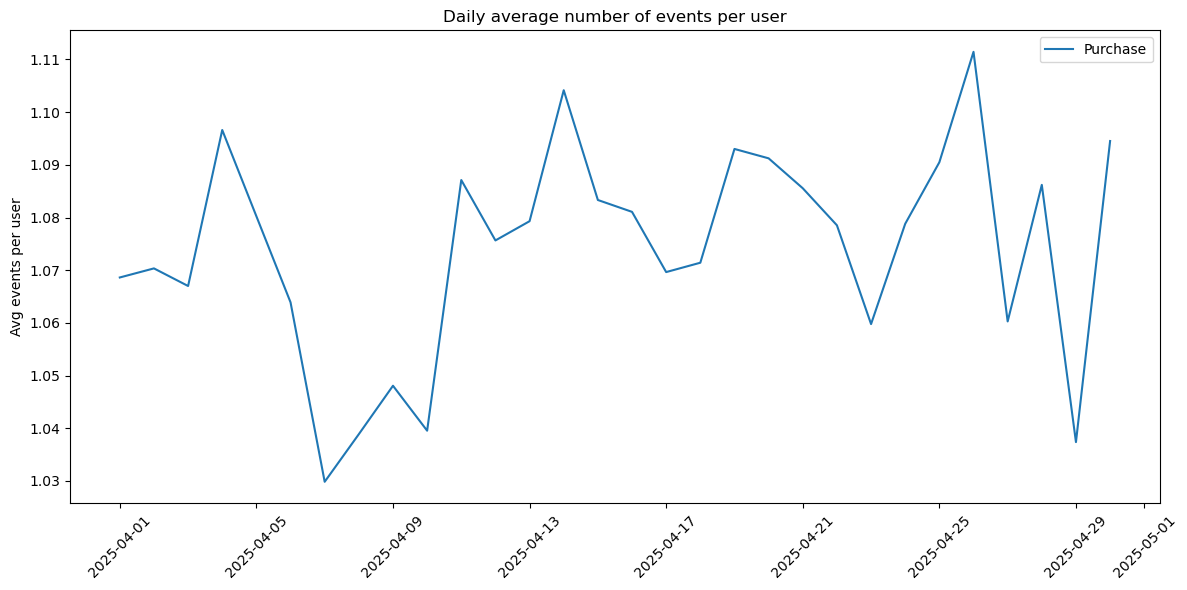

In [10]:
plt.figure(figsize=(12,6))
plt.plot(daily_conv['event_date'], daily_conv['views'], label='Views')
plt.plot(daily_conv['event_date'], daily_conv['carts'], label='Carts')
plt.plot(daily_conv['event_date'], daily_conv['purchases'], label='Purchases')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Count of sessions with event")
plt.title("Daily absolute counts by funnel step (sessions)")
plt.tight_layout()
plt.show()


events_per_user = (
    df.groupby(['event_date', 'user_id', 'event_norm'])
    .size()
    .reset_index(name='event_count')
)

avg_events_per_user = (
    events_per_user.groupby(['event_date', 'event_norm'])
    .agg(avg_events=('event_count', 'mean'))
    .reset_index()
)

mask = avg_events_per_user['event_norm'].isin(['view','cart','purchase'])
avg_events_filtered = avg_events_per_user[mask]

plt.figure(figsize=(12,6))
for e in avg_events_filtered['event_norm'].unique():
    subset = avg_events_filtered[avg_events_filtered['event_norm'] == e]
    plt.plot(subset['event_date'], subset['avg_events'], label=e.capitalize())

plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Avg events per user")
plt.title("Daily average number of events per user")
plt.tight_layout()
plt.show()

Абсолютные значения (views, carts, purchases) ведут себя согласованно, пики и спады совпадают (похоже на недельную сезонность). Но при этом в среднем число событий на пользователя по просмотрам и добавлениям в корзину остаётся высоким, а по покупкам почти всегда около 1. То есть большинство пользователей совершает не более одной покупки в день. Проблема проявилась именно на этапе cart - purchase, корзин становится больше (пользователи активно добавляют товары), но конверсия в покупку снижается, и среднее число покупок на пользователя остаётся почти плоским. Это значит воронка ломается на шаге оформления заказа, а не на просмотре или добавлении в корзину

#### **3. Базовые срезы — 1 балл**
1. Постройте динамику проблемного события в разрезе:
- платформ,
- регионов,
- источников трафика,
- категорий товаров.

2. Есть ли выделяющийся срез?

*В этом пункте в качестве события продолжаем смотреть метрику среднего на пользователя*

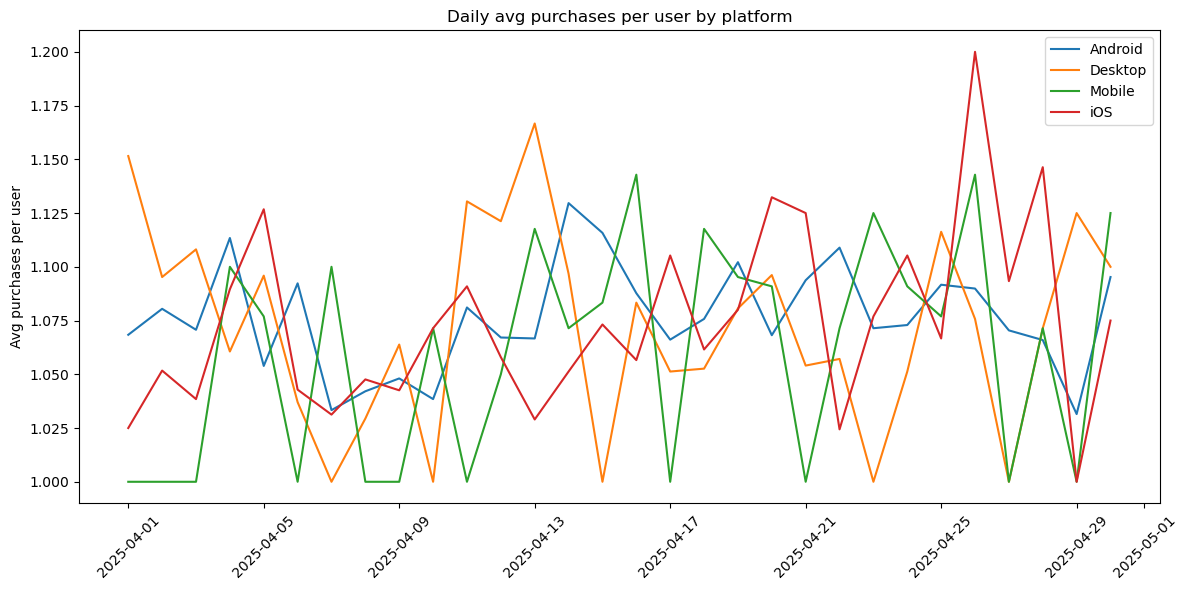

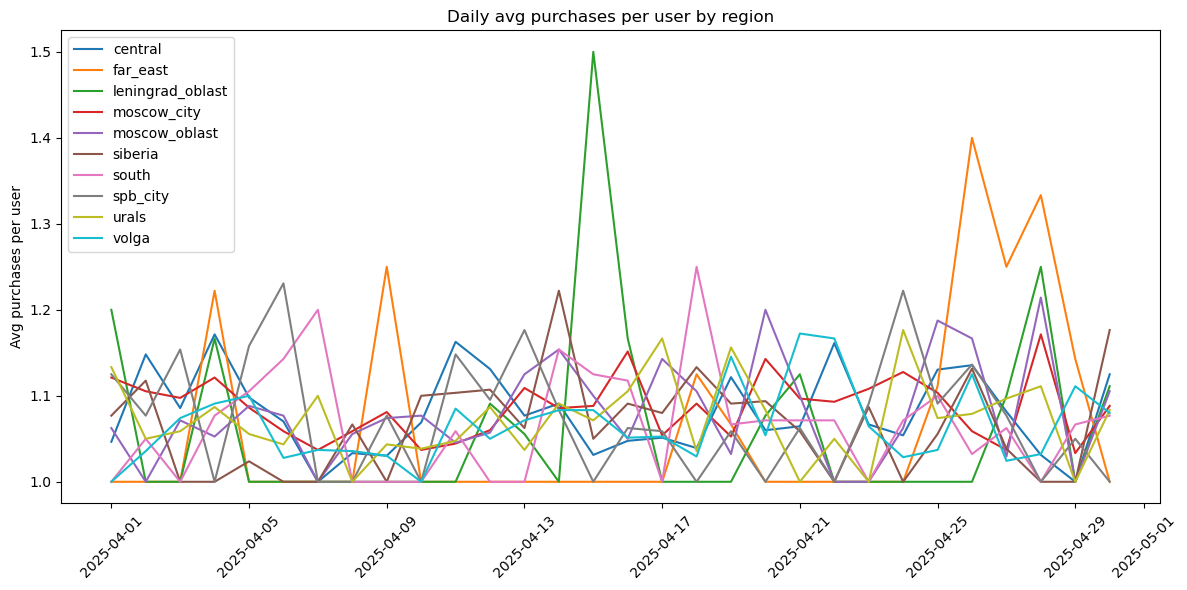

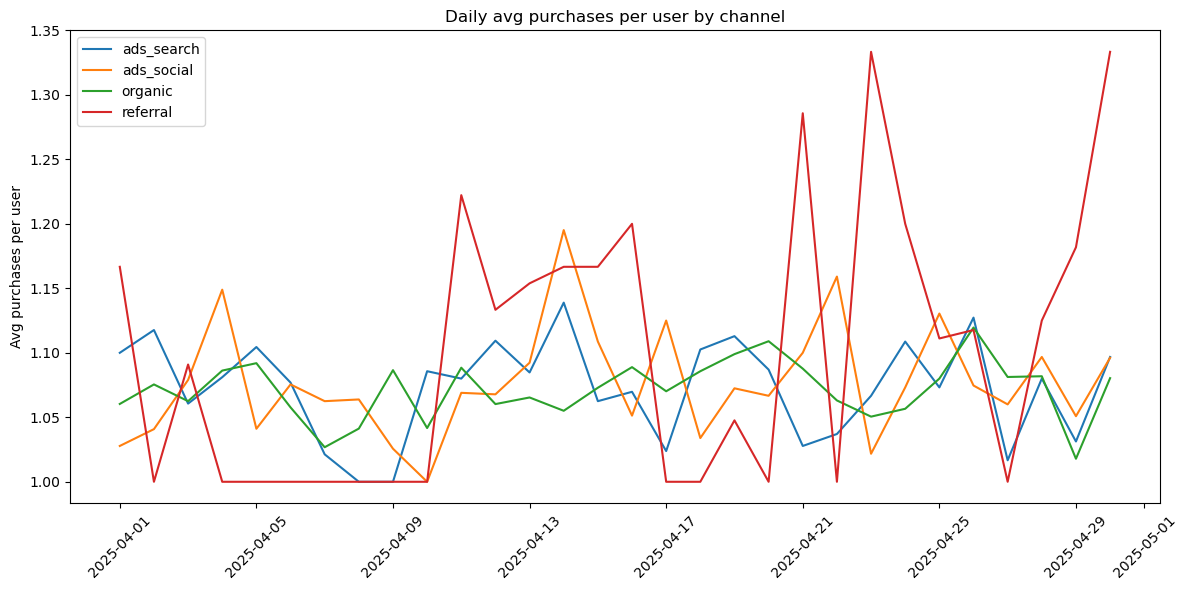

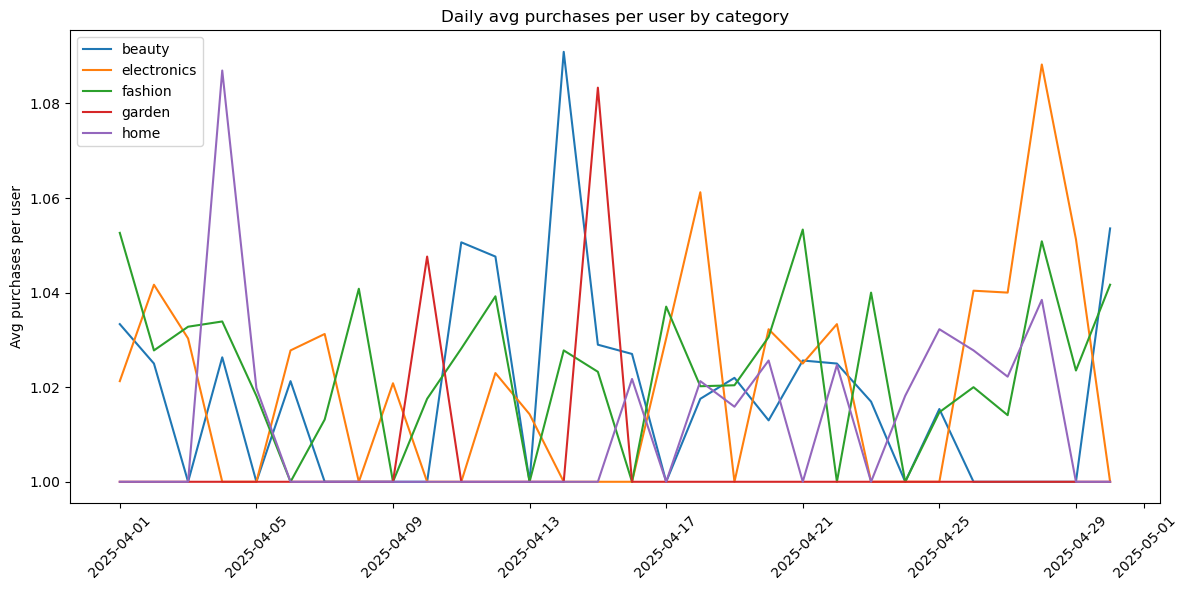

In [12]:
import matplotlib.pyplot as plt

def avg_events_per_user_by_dim(df, dim, event_name='purchase'):
    df_filtered = df[df['event_norm'] == event_name]

    events_per_user = (
        df_filtered.groupby(['event_date', dim, 'user_id'])
        .size()
        .reset_index(name='event_count')
    )

    avg_per_user = (
        events_per_user.groupby(['event_date', dim])
        .agg(avg_events=('event_count', 'mean'))
        .reset_index()
    )
    return avg_per_user

avg_by_platform = avg_events_per_user_by_dim(df, 'platform')

plt.figure(figsize=(12,6))
for p in avg_by_platform['platform'].unique():
    subset = avg_by_platform[avg_by_platform['platform'] == p]
    plt.plot(subset['event_date'], subset['avg_events'], label=p)
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Avg purchases per user")
plt.title("Daily avg purchases per user by platform")
plt.tight_layout()
plt.show()

avg_by_region = avg_events_per_user_by_dim(df, 'region')

plt.figure(figsize=(12,6))
for r in avg_by_region['region'].unique():
    subset = avg_by_region[avg_by_region['region'] == r]
    plt.plot(subset['event_date'], subset['avg_events'], label=r)
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Avg purchases per user")
plt.title("Daily avg purchases per user by region")
plt.tight_layout()
plt.show()

avg_by_channel = avg_events_per_user_by_dim(df, 'channel')

plt.figure(figsize=(12,6))
for c in avg_by_channel['channel'].unique():
    subset = avg_by_channel[avg_by_channel['channel'] == c]
    plt.plot(subset['event_date'], subset['avg_events'], label=c)
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Avg purchases per user")
plt.title("Daily avg purchases per user by channel")
plt.tight_layout()
plt.show()

avg_by_category = avg_events_per_user_by_dim(df, 'category')

plt.figure(figsize=(12,6))
for cat in avg_by_category['category'].unique():
    subset = avg_by_category[avg_by_category['category'] == cat]
    plt.plot(subset['event_date'], subset['avg_events'], label=cat)
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Avg purchases per user")
plt.title("Daily avg purchases per user by category")
plt.tight_layout()
plt.show()

Внимание больше всего привлекает срез Daily avg purchases per user by channel. Все каналы показывают схожий уровень - в среднем около 1-1.1 покупок на пользователя в день, что логично, большинство пользователей покупает один раз. Referral сильно колеблется, видны резкие скачки то вверх (до 1.3+), то вниз (ровно 1.0). Это может указывать на то, что реферального трафика мало, и поэтому метрика чувствительна к единичным активным пользователям. Ads (search, social) и organic более стабильны - их динамика колеблется в узком диапазоне, без резких выбросов. Это говорит о большем объёме пользователей, где эффект единичных активных меньше заметен. Вывод - Referral ведёт себя аномально из-за малого трафика и шумит, а основная проблема с падением конверсии не ограничена каким-то конкретным каналом.

#### **4. Детальные срезы — 1 балл**
1. Постройте динамику события для iOS и Android с разложением по версиям приложения.
2. Помогло ли это локализовать проблему?

*В этом пункте в качестве события продолжаем смотреть метрику среднего на пользователя*

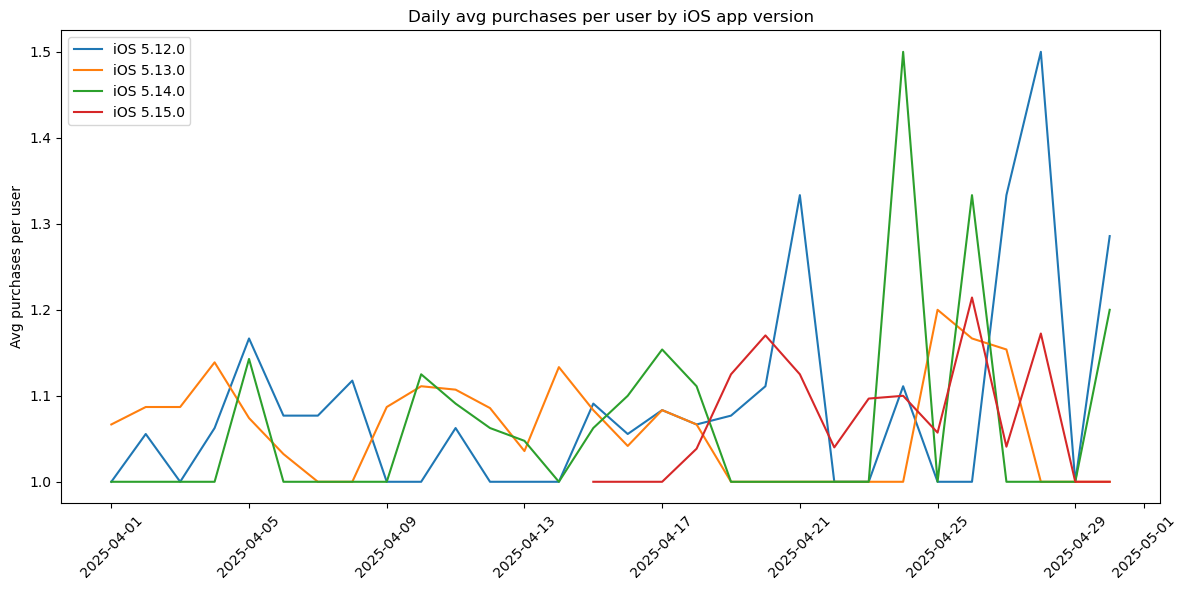

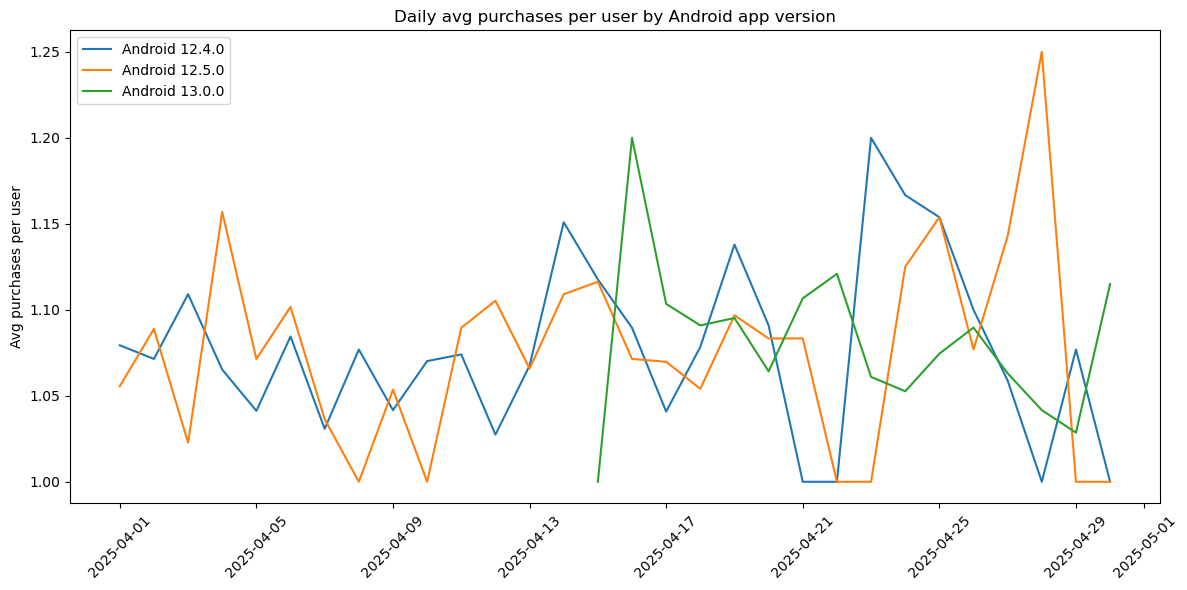

In [13]:
def avg_events_per_user_by_platform_version(df, platform, event_name='purchase'):
    df_filtered = df[(df['platform'] == platform) & (df['event_norm'] == event_name)]
    
    events_per_user = (
        df_filtered.groupby(['event_date', 'app_version', 'user_id'])
        .size()
        .reset_index(name='event_count')
    )
    
    avg_per_user = (
        events_per_user.groupby(['event_date', 'app_version'])
        .agg(avg_events=('event_count', 'mean'))
        .reset_index()
    )
    return avg_per_user

avg_ios = avg_events_per_user_by_platform_version(df, 'iOS')

plt.figure(figsize=(12,6))
for v in avg_ios['app_version'].unique():
    subset = avg_ios[avg_ios['app_version'] == v]
    plt.plot(subset['event_date'], subset['avg_events'], label=f"iOS {v}")
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Avg purchases per user")
plt.title("Daily avg purchases per user by iOS app version")
plt.tight_layout()
plt.show()

avg_android = avg_events_per_user_by_platform_version(df, 'Android')

plt.figure(figsize=(12,6))
for v in avg_android['app_version'].unique():
    subset = avg_android[avg_android['app_version'] == v]
    plt.plot(subset['event_date'], subset['avg_events'], label=f"Android {v}")
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Avg purchases per user")
plt.title("Daily avg purchases per user by Android app version")
plt.tight_layout()
plt.show()

По iOS метрика средние покупки на пользователя колеблется сильнее, чем на Android. Особенно заметно, что на версиях 5.14.0 и 5.15.0 появляются провалы до 1.0 (ровно одна покупка в день на пользователя, без повторов), а колебания слишком резкие. Это может указывать на баг в новых версиях приложения, часть пользователей не может завершить больше одной покупки или процесс checkout работает нестабильно. Android версии 13.0.0 даёт небольшой разброс, но резких провалов не видно. Проблема выражена именно на iOS, особенно на новых версиях приложения (5.14.0 и 5.15.0). На Android метрика остаётся относительно стабильной

#### **5. Поиск причин — 1 балл**
1. Для проблемной платформы постройте динамику ВСЕХ событий в разрезе версий приложения.
2. Сформулируйте гипотезу, что именно могло пойти не так в новом релизе? Может быть, пользователи стали заменять один функционал другим?

*В этом пункте в качестве событий продолжаем смотреть метрику среднего на пользователя*

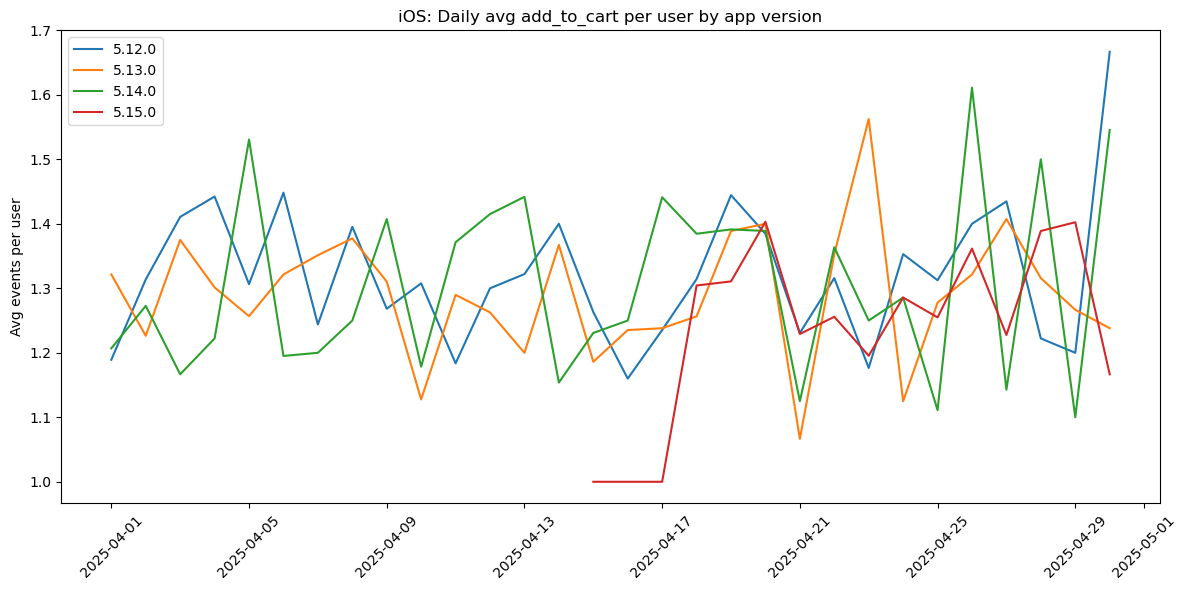

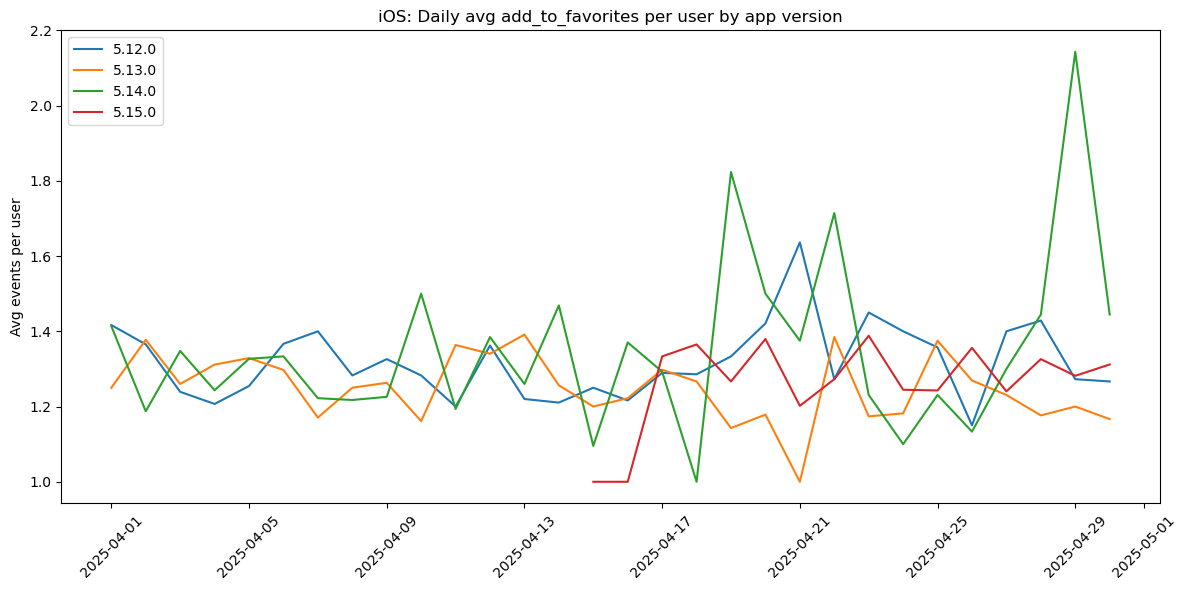

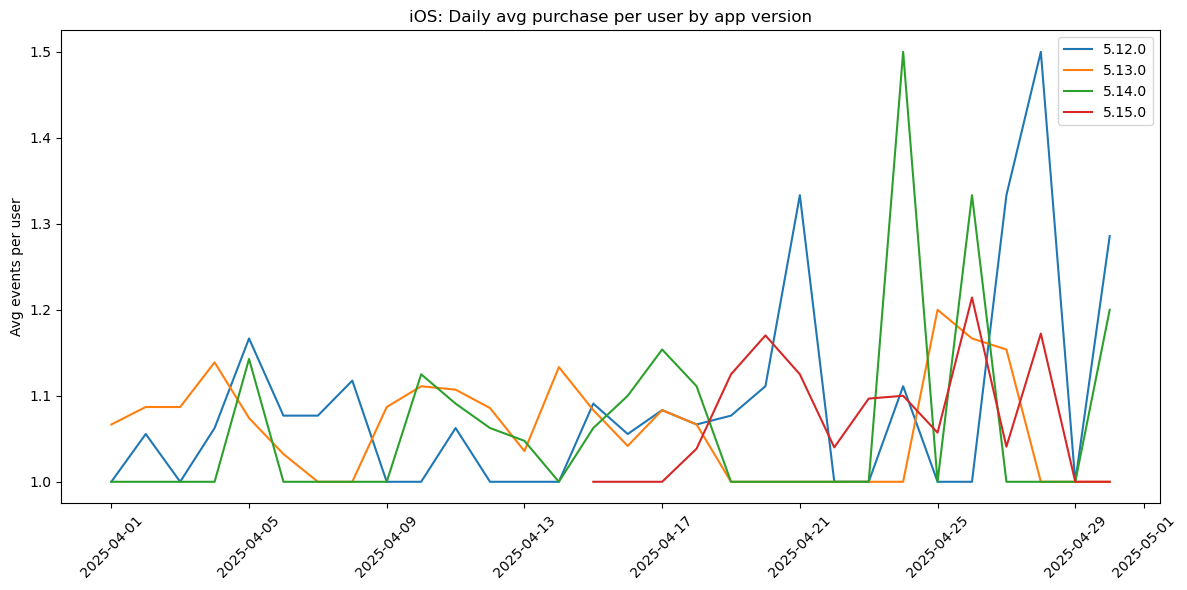

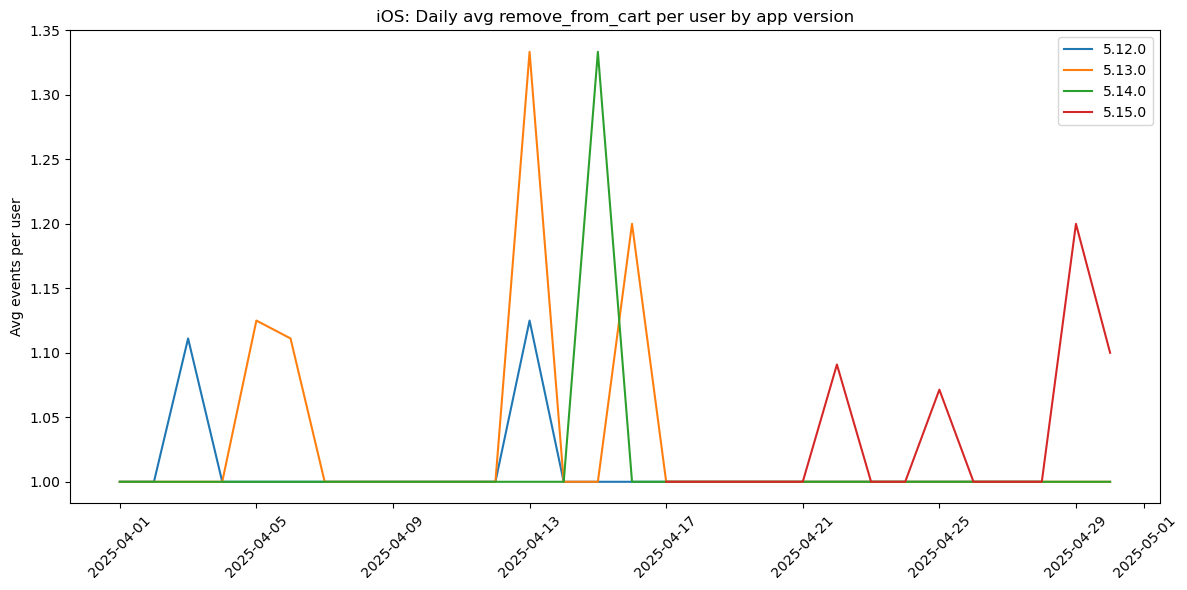

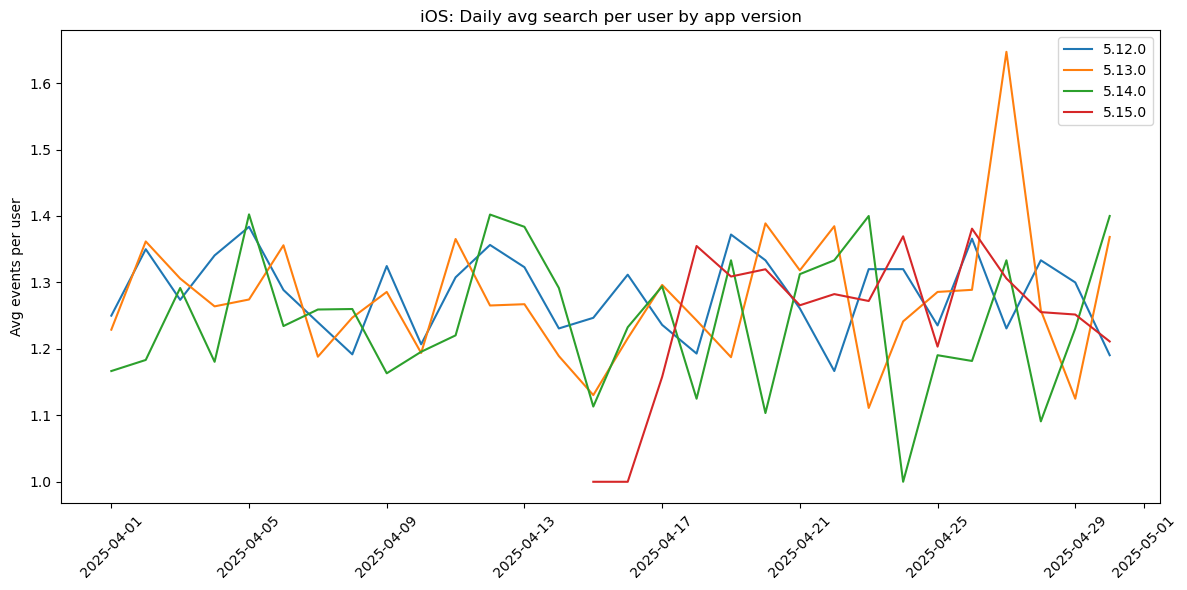

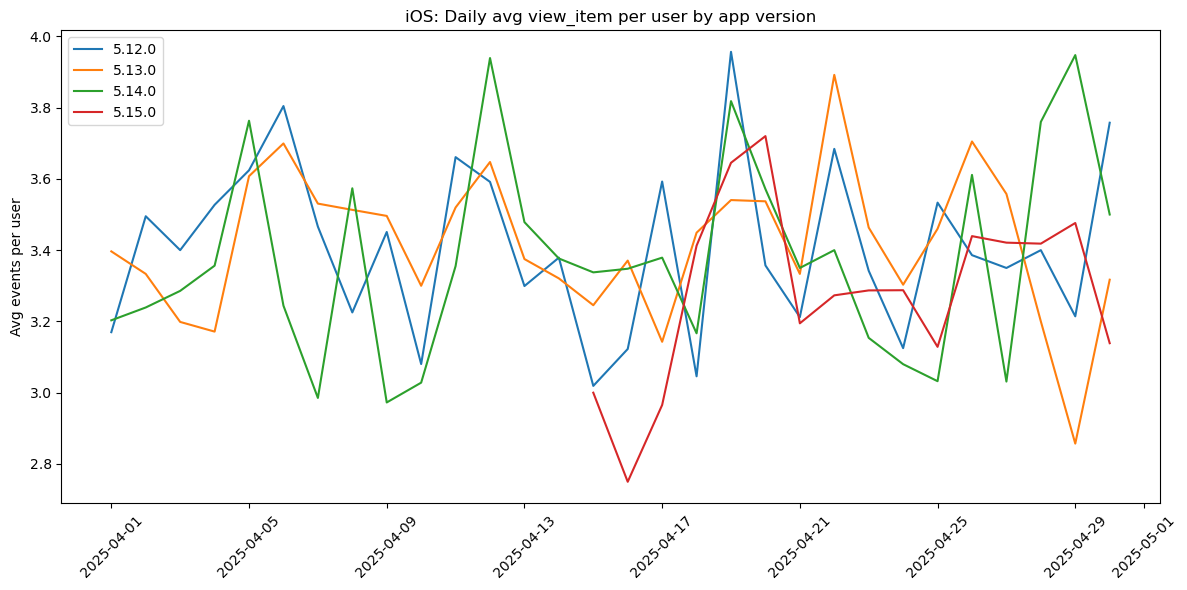

In [15]:
import matplotlib.pyplot as plt

def avg_events_per_user_by_dim_event(df, platform, dim='app_version'):
    df_filtered = df[df['platform'] == platform]

    events_per_user = (
        df_filtered.groupby(['event_date', dim, 'user_id', 'event_norm'])
        .size()
        .reset_index(name='event_count')
    )

    avg_per_user = (
        events_per_user.groupby(['event_date', dim, 'event_norm'])
        .agg(avg_events=('event_count', 'mean'))
        .reset_index()
    )
    return avg_per_user

avg_ios_all = avg_events_per_user_by_dim_event(df, 'iOS')

for e in avg_ios_all['event_norm'].unique():
    plt.figure(figsize=(12,6))
    for v in avg_ios_all['app_version'].unique():
        subset = avg_ios_all[(avg_ios_all['app_version'] == v) & 
                             (avg_ios_all['event_norm'] == e)]
        if not subset.empty:
            plt.plot(subset['event_date'], subset['avg_events'], label=f"{v}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.ylabel("Avg events per user")
    plt.title(f"iOS: Daily avg {e} per user by app version")
    plt.tight_layout()
    plt.show()

Посмотрим на график события remove_from_cart для iOS в разрезе версий приложения. На большинстве дат метрика ровно 1.0 событие на пользователя - то есть если пользователь удаляет, то почти всегда один раз за день. Иногда встречаются всплески выше 1.2-1.3, но это скорее выбросы, которые связаны с небольшой аудиторией в отдельных версиях (особенно заметно для 5.14.0 и 5.15.0). Новые версии (5.14.0 и 5.15.0) демонстрируют больше таких скачков и шумности, чем старые версии. Гипотеза: это может указывать на менее стабильное поведение пользователей или баги в UX, провоцирующие частые удаления товаров из корзины. Стабильность поведения удаление из корзины нарушена именно в последних версиях приложения для iOS. Это может быть косвенным подтверждением проблем в checkout-флоу - пользователи чаще корректируют корзину и не доходят до покупки

#### **6. Новости для команды — 1 балл**

На основе проведённого расследования подготовьте сообщение для команды о том, что именно пошло не так.

Мы проанализировали воронку и динамику событий за апрель. Проблема с падением конверсии проявилась на этапе корзина - покупка. Пользователи активно продолжают просматривать товары и добавлять их в корзину, но реже завершают оформление заказа. Абсолютные значения событий (просмотры, корзины, покупки) демонстрируют стабильную сезонность, но в среднем на пользователя покупки остаются на уровне одной в день и не растут. В разрезе каналов трафика все источники показывают схожую картину - проблема носит общий характер, не связана только с рекламой или рефералами. В разрезе платформ различия видны, на iOS, особенно в версиях 5.14.0 и 5.15.0, среднее число покупок на пользователя снизилось сильнее и наблюдаются резкие скачки по сопутствующим событиям (например, remove_from_cart). Это может говорить о баге или проблеме UX именно в новых версиях приложения. На Android ситуация стабильнее, метрики держатся в привычном диапазоне без резких провалов. Гипотеза: падение связано с изменениями в процессе checkout на iOS - пользователи чаще редактируют корзину и не доходят до завершения покупки. Следует проверить изменения в iOS-приложении в версиях 5.14.0 и 5.15.0 (checkout, корзина, платёжный экран), ошибки в момент оформления заказа, логи по транзакциям и платёжным системам именно для iOS